<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1tG6xVRCmDyi6K8TWgoNd_31vV034VcSO?usp=sharing"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>

</table>

### Install BRAILS

In [ ]:
!pip install BRAILS

In [ ]:
# update pytorch with cuda11.0. This is required if you have GPU and want to get 'year', 'elevated' 
#!pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Updates(03/10/2021): No need to manually update cuda, the default environment here is ok.

## Create a city-scale building inventory
The following are examples showing how to create building inventories for a selected region of interest.

You need to provide the Google maps API key for downloading street view and satellite images.

Instructions on obtaining the API key can be found here: https://developers.google.com/maps/documentation/embed/get-api-key

Keep in mind there is a limit of free calls you can make to the API, so keep numBldg small for testing. 



## Example 2: Workflow

In [ ]:
# A neighborhood in Lake Charles, Louisiana, USA

# Import the CityBuilder from BRAILS
from brails.CityBuilder import CityBuilder

# Initialize the CityBuilder
cityBuilder = CityBuilder(attributes=['softstory','occupancy','roofshape','year','numstories','elevated'], 
                   numBldg=10,random=False, place='Berkeley, CA', footPrints='OSM',
                   GoogleMapAPIKey='put-your-key-here',overwrite=True,reDownloadImgs=True)

# create the city-scale BIM file
BIM = cityBuilder.build()


Berkeley, CA
Trying to get OSM footprints by the place name Berkeley, CA.
Footprint saved at tmp/Berkeley__CA_footprints_OSM.geojson
35273 buildings found.
10 buildings selected.
Starting downloading images.
empty image from API: -122.239139, 37.852607
empty image from API: -122.258374, 37.874862
Images downloaded ...
A default softstory model will be used: softstory_ResNet50_V0.1.


/usr/local/lib/python3.7/dist-packages/brails/CityBuilder.py:185: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.BIM['Lon'] = self.BIM['geometry'].centroid.x#.round(decimals=6)
/usr/local/lib/python3.7/dist-packages/brails/CityBuilder.py:186: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  self.BIM['Lat'] = self.BIM['geometry'].centroid.y#.round(decimals=6)


Model found locally: tmp/softstory_ResNet50_V0.1.h5 
Results written in file tmp/softstory_preds.csv
A default occupancy model will be used: occupancy_ResNet50_V0.1.
Model found locally: tmp/occupancy_ResNet50_V0.1.h5 
Results written in file tmp/occupancy_preds.csv
A default roof type model will be used: rooftype_ResNet50_V0.2.
Model found locally: tmp/rooftype_ResNet50_V0.2.h5 
Results written in file tmp/roofType_preds.csv
Testing image 0 from 10


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:285: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
/usr/local/lib/python3.7/dist-packages/brails/modules/Year_Built_Classifier/YearBuiltClassifier.py:132: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = sm(outputs_com.data)


Results written in file tmp/YearBuilt.csv
Performing inferences on images...


100%|██████████| 10/10 [00:02<00:00,  3.40it/s]



Total execution time: 00:00:03.59
Loading remote model file to the weights folder..



Loading remote model (encoder) file to the weights folder..



Loading remote model (decoder) file to the weights folder..



Results written in file tmp/FoundationElevation.csv
BIM saved at tmp/Berkeley__CA_BIM.geojson


If you have errors like this: 
UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x152821518>
, that means you didn't provide the correct GoogleMapAPIKey, or the key somehow didn't work. The solution is to provide the correct key, let reDownloadImgs=True, and run it again.


,geometry,ID,softStory,softStoryProb,occupancy,occupancyProb,roofShape,roofShapeProb
0,"POLYGON ((-122.28425 37.89321, -122.28428 37.8...",0,others,0.884252,RES1,0.997940,hipped,0.901893
1,"POLYGON ((-122.28131 37.89328, -122.28141 37.8...",1,softstory,0.818908,RES3,0.999335,hipped,0.999055
2,"POLYGON ((-122.28172 37.89367, -122.28169 37.8...",2,softstory,0.964414,RES3,0.949093,hipped,0.986971
3,"POLYGON ((-122.28151 37.89461, -122.28140 37.8...",3,others,0.954046,RES1,0.502741,gabled,0.489584
4,"POLYGON ((-122.28569 37.89547, -122.28587 37.8...",4,others,0.997930,RES1,0.869104,flat,0.608942
...,...,...,...,...,...,...,...,...
995,"POLYGON ((-122.24954 37.86078, -122.24953 37.8...",995,others,0.906596,RES1,0.952020,hipped,0.949422
996,"POLYGON ((-122.24768 37.86140, -122.24752 37.8...",996,others,0.999919,RES1,0.998013,hipped,0.982831
997,"POLYGON ((-122.24778 37.86217, -122.24779 37.8...",997,others,0.868830,RES3,0.999622,hipped,0.984183
998,"POLYGON ((-122.24554 37.86245, -122.24554 37.8...",998,softstory,0.999849,RES3,0.988792,hipped,0.838843


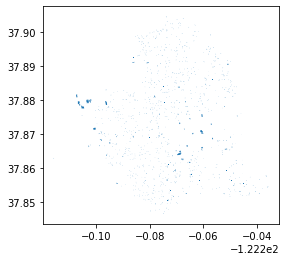

In [ ]:
BIM.plot()
BIM

## Example 3: Workflow

In [ ]:
# A neighborhood in Christchurch, New Zealand

# Import the module from BRAILS
from brails.CityBuilder import CityBuilder

# Initialize the CityBuilder
cityBuilder = CityBuilder(attributes=['softstory','occupancy','roofshape','year'], 
                   numBldg=100,random=False, bbox=[-43.526607, 172.650664,-43.528722, 172.652770], 
                   GoogleMapAPIKey='put-your-key-here',overwrite=True,reDownloadImgs=False)

BIM = cityBuilder.build()

,geometry,ID,softStory,softStoryProb,occupancy,occupancyProb,roofShape,roofShapeProb
0,"POLYGON ((172.65118 -43.52845, 172.65118 -43.5...",0,others,0.999716,RES1,0.999995,gabled,0.549041
1,"POLYGON ((172.65264 -43.52806, 172.65246 -43.5...",1,others,0.997607,RES1,0.999311,gabled,0.529588
2,"POLYGON ((172.65181 -43.52791, 172.65191 -43.5...",2,softstory,0.675168,RES1,0.999954,gabled,0.882069
3,"POLYGON ((172.65113 -43.52862, 172.65114 -43.5...",3,softstory,0.881161,RES1,0.999982,flat,0.864188
4,"POLYGON ((172.65083 -43.52830, 172.65102 -43.5...",4,others,0.825773,RES1,0.998141,flat,0.795155
...,...,...,...,...,...,...,...,...
83,"POLYGON ((172.65103 -43.52716, 172.65110 -43.5...",83,others,0.999159,RES1,0.999082,flat,0.812168
84,"POLYGON ((172.65227 -43.52771, 172.65238 -43.5...",84,others,0.998915,RES3,0.994101,flat,0.575926
85,"POLYGON ((172.65142 -43.52682, 172.65141 -43.5...",85,others,0.987648,RES1,0.910897,flat,0.531442
86,"POLYGON ((172.65163 -43.52711, 172.65163 -43.5...",86,others,0.999783,RES1,0.999997,flat,0.804593


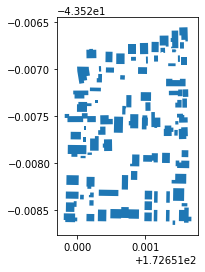

In [ ]:
BIM.plot()
BIM